# 2023-02-02

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib

[]

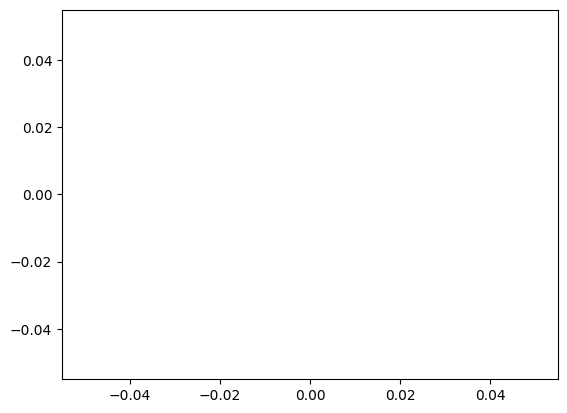

In [4]:
plt.plot()

[]

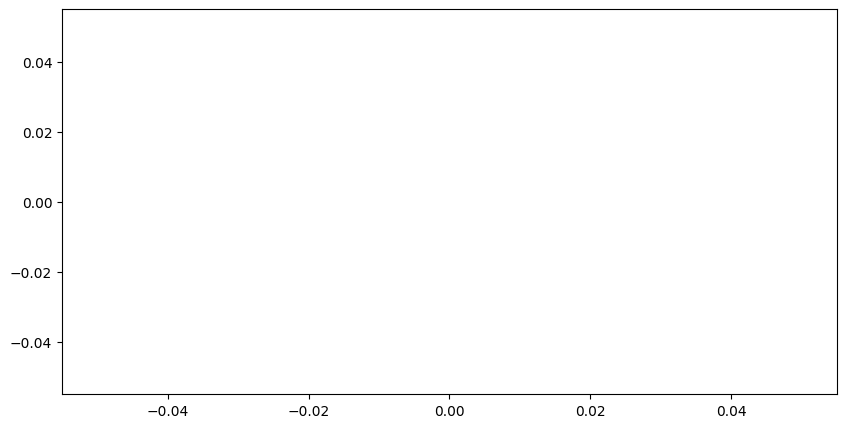

In [6]:
plt.figure(figsize=(10, 5))
plt.plot()

Text(0.5, 1.0, 'title')

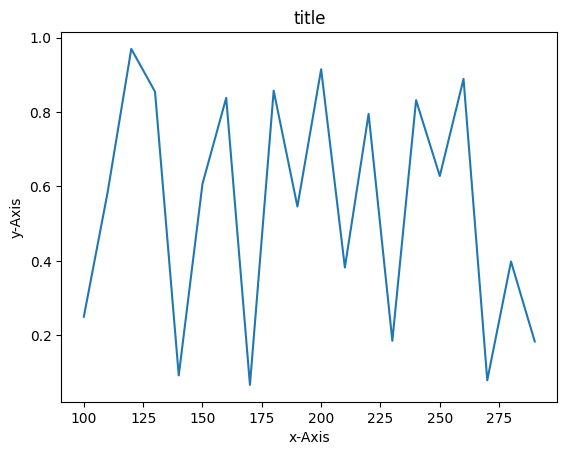

In [9]:
# 임의의 데이터 생성

import numpy as np
x = np.arange(100, 300, 10)
y = np.random.rand(20)
plt.plot(x, y)
plt.xlabel('x-Axis')
plt.ylabel('y-Axis')
plt.title('title')

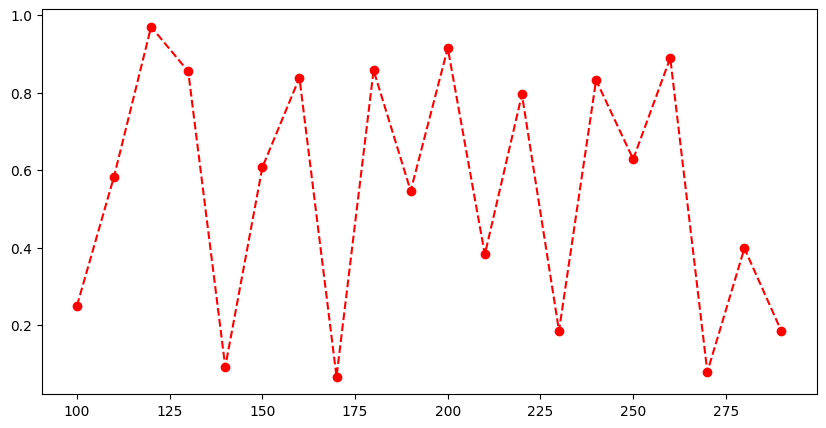

In [10]:
plt.figure(figsize = (10, 5))
plt.plot(x, y, color = 'r', linestyle = '--', marker = 'o')  # plt.plot(x, y, 'ro--')

## 그래프를 여러개 그리는 방법(1)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c0349b3640>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c0349b35b0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c0349b3c40>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c0349b3fa0>}

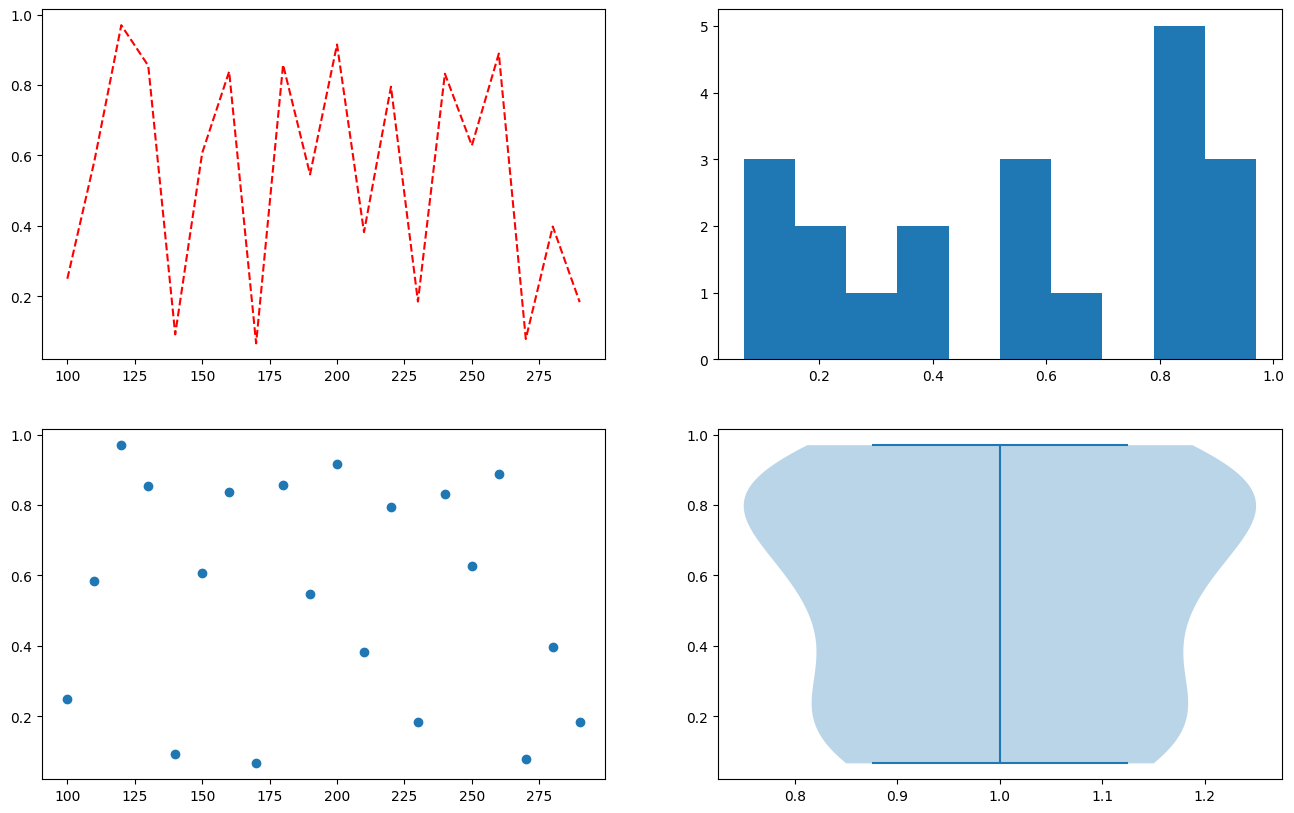

In [15]:
fig = plt.figure(figsize = (16, 10))

ax1 = fig.add_subplot(2, 2, 1)            # 2 x 2 사이즈로 구역을 나누고 첫번째 도화지가 ax1
ax1.plot(x, y, color = 'r', linestyle = '--')

ax2 = fig.add_subplot(2, 2, 2)            # 2 x 2 사이즈에서 두번째
ax2.hist(y)

ax3 = fig.add_subplot(2, 2, 3)            # 2 x 2 사이즈에서 세번째
ax3.scatter(x, y)

ax4 = fig.add_subplot(2, 2, 4)            # 2 x 2 사이즈에서 마지막
ax4.violinplot(y)

## 그래프를 여러개 그리는 방법(2)

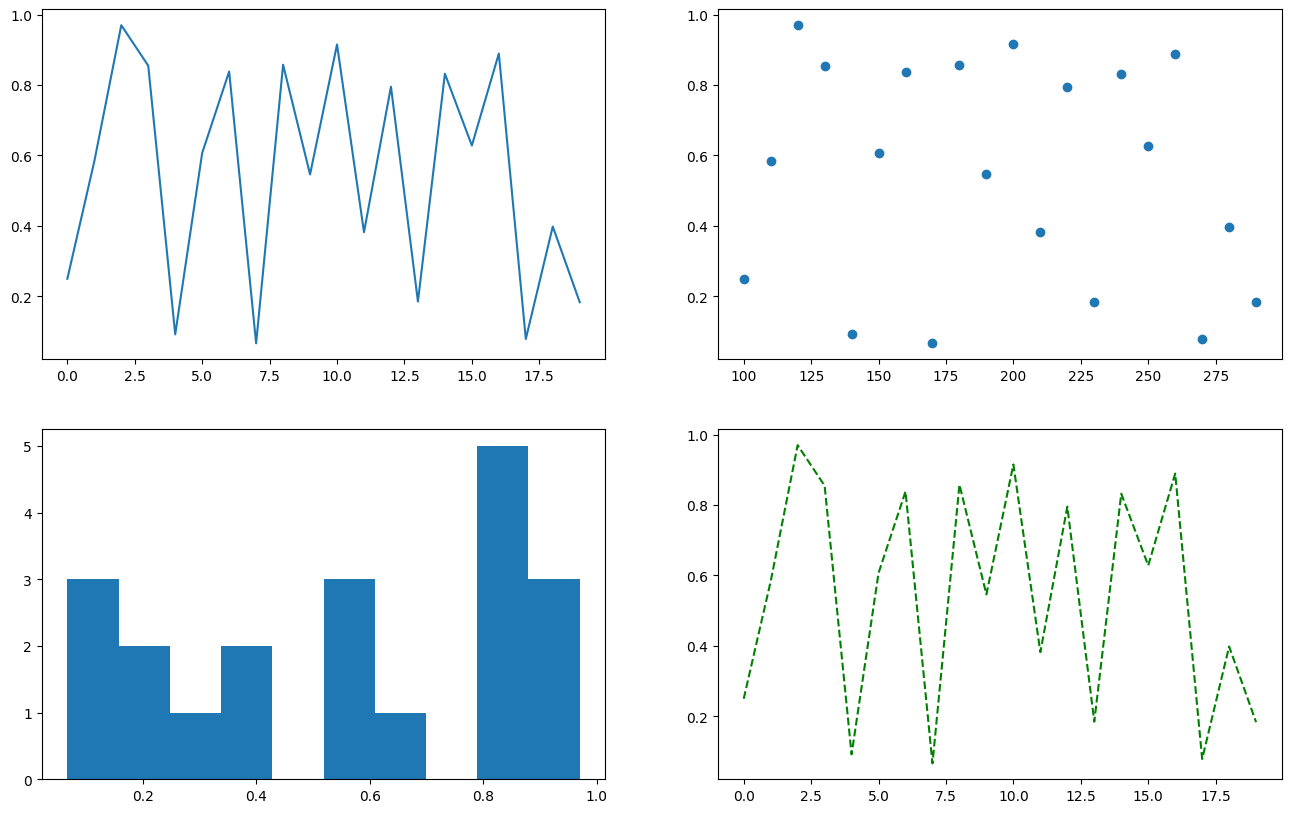

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (16, 10))
# print(axes.shape) (2, 2)

axes[0, 0].plot(y)
axes[1, 0].hist(y)
axes[0, 1].scatter(x, y)
axes[1, 1].plot(y, 'g--')

In [ ]:
# seabron (https://seaborn.pydata.org/examples/index.html)
# plotly

## Pandas고급활용

In [21]:
!pip install -U finance-datareader


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import FinanceDataReader as fdr

In [12]:
import pandas as pd

### 1. Query

In [23]:
df = fdr.DataReader('AAPL', '2017')     # open = 시가, high = 고가, low = 저가, close = 종가, volume = 거래량
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.174753,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.144341,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.282377,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.586531,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.839214,134247600


In [24]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1.531000e+03
mean,88.638010,89.685163,87.635673,88.704799,87.310917,1.149028e+08
std,47.910284,48.560518,47.259384,47.932146,48.382715,5.349184e+07
min,28.950001,29.082500,28.690001,29.004999,27.144341,3.519590e+07
25%,44.011249,44.441250,43.723749,44.155001,42.239868,8.003210e+07
50%,67.699997,69.474998,66.830002,68.339996,67.110054,1.005660e+08
75%,136.104996,137.415001,134.279999,135.974998,135.258224,1.337424e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,4.479400e+08


In [25]:
df.query('Close >= 150')   # 종가가 150달러 이상인 것들을 가져온다.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-16,148.539993,151.190002,146.470001,151.119995,150.029022,103296000
2021-08-17,150.229996,151.679993,149.089996,150.190002,149.105728,92229700
2021-08-30,149.000000,153.490005,148.610001,153.119995,152.014572,90956700
2021-08-31,152.660004,152.800003,151.289993,151.830002,150.733902,86453100
2021-09-01,152.830002,154.979996,152.339996,152.509995,151.408997,80313700
...,...,...,...,...,...,...
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74829600


In [26]:
df.query('Volume <= 74829600')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-07,34.764999,34.994999,34.697498,34.880001,32.783985,69785200
2017-03-08,34.737499,34.950001,34.705002,34.750000,32.661800,74828800
2017-03-13,34.712502,34.857498,34.705002,34.799999,32.708782,69686800
2017-03-14,34.825001,34.912498,34.709999,34.747501,32.659447,61236400
2017-04-07,35.932499,36.044998,35.817501,35.834999,33.681591,66688800
...,...,...,...,...,...,...
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800


In [27]:
df.query('Date >= "2023-01-01"')     # index(date)기준으로도 data를 가져올 수 있다.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,125.070000,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,126.360001,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,125.019997,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.619995,87686600
2023-01-09,130.470001,133.410004,129.889999,130.149994,130.149994,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,130.729996,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,133.490005,69458900
2023-01-12,133.880005,134.259995,131.440002,133.410004,133.410004,71379600
2023-01-13,132.029999,134.919998,131.660004,134.759995,134.759995,57758000


In [28]:
df.query('Open < Close')      # 시가보다 종가가 크다(주식이 오른 날)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.174753,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.144341,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.282377,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.586531,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.839214,134247600
...,...,...,...,...,...,...
2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800


In [31]:
df[df['Volume'].isin([54105100, 70492800])]            # isin(): 특정 데이터가 있는가 없는가 -- 있는 경우(True)를 []형태로 만들어 데이터프레임 형태로 값을 가져온다.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800


In [32]:
df.query('Volume in [54105100, 70492800]')            # query를 이용해 위와 같은 결과를 얻음 1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800


In [33]:
df.query('Volume == 54105100 or Volume == 70492800')  # query를 이용해 위와 같은 결과를 얻음 2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800


In [34]:
df.query("Date == '2023-01-27'")           # index(date)활용

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800


In [35]:
Volume = 70492800
df.query('Volume == @Volume')   # 변수 참조 (위에서 변수에 값을 지정한 후 해당 데이터 프레임에 같은 값이 있을 때 데이터를 가져옴)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800


### 2. Reset_index

In [36]:
# index -> column
df.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.174753,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.144341,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.282377,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.586531,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.839214,134247600
...,...,...,...,...,...,...,...
1526,2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
1527,2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800
1528,2023-01-30,144.960007,145.550003,142.850006,143.000000,143.000000,64015300
1529,2023-01-31,142.699997,144.339996,142.279999,144.289993,144.289993,65874500


### [실습]

In [ ]:
# Q. 변수참조를 활용해서 Volumn 평균 이상인 데이터를 가져오고, 시가(Open)가 종가(Close)보다 높은 데이터를 추출해보세요

In [44]:
volume1 = df['Volume'].mean()                     # Volume의 mean을 volume1 변수에 대입 
df_volume = df.query('Volume >= @volume1 and Open > Close')  # Volume >= @volume1 and 시가가 종가보다 큰 경우를 query를 통해 가져와 df_volume 변수에 대입
df_volume

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,30.112499,30.112499,29.932501,30.000000,28.075512,130391600
2017-02-15,33.880001,34.067501,33.654999,33.877499,31.841724,142492400
2017-03-17,35.250000,35.250000,34.972500,34.997501,32.894421,175540000
2017-03-21,35.527500,35.700001,34.932499,34.959999,32.859177,158119600
2017-04-11,35.735001,35.837502,35.014999,35.407501,33.279785,121517600
...,...,...,...,...,...,...
2022-09-16,151.210007,151.350006,148.369995,150.699997,150.450424,162278800
2022-09-29,146.100006,146.720001,140.679993,142.479996,142.244034,128138200
2022-09-30,141.279999,143.100006,138.000000,138.199997,137.971115,124925300


### 3. apply

In [46]:
df_kospi = fdr.StockListing('KOSPI')
df_kospi.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,62700,1,900,1.46,63200,63700,62600,12565966,794831005500,374305365885000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,523000,1,1000,0.19,529000,532000,522000,154132,81008406000,122382000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,92700,1,1300,1.42,94900,94900,92700,2416577,226871629700,67485819235500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,811000,1,7000,0.87,806000,813000,806000,28867,23378052000,57722114000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,715000,2,-5000,-0.69,722000,729000,712000,124212,89193552000,49166638950000,68764530,STK


In [48]:
# 오른주식, 내린주식을 새로운 칼럼으로 선언

# 방법1. apply() 안에 lambda를 활용
df_kospi['방법1'] = df_kospi['ChagesRatio'].apply(lambda x: '오른주식' if x>0 else '내린주식')             # apply() : 컬럼 별로 함수 적용 /()안에는 함수가 들어간다.
df_kospi.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,방법1
0,005930,KR7005930003,삼성전자,KOSPI,,62700,1,900,1.46,63200,63700,62600,12565966,794831005500,374305365885000,5969782550,STK,오른주식
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,523000,1,1000,0.19,529000,532000,522000,154132,81008406000,122382000000000,234000000,STK,오른주식
2,000660,KR7000660001,SK하이닉스,KOSPI,,92700,1,1300,1.42,94900,94900,92700,2416577,226871629700,67485819235500,728002365,STK,오른주식
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,811000,1,7000,0.87,806000,813000,806000,28867,23378052000,57722114000000,71174000,STK,오른주식
4,006400,KR7006400006,삼성SDI,KOSPI,,715000,2,-5000,-0.69,722000,729000,712000,124212,89193552000,49166638950000,68764530,STK,내린주식


In [51]:
# 방법2. 함수를 새로 생성하여 apply()안에 넣기

def check_chagesratio(data):
    if data > 0:
        return '오른주식'
    else:
        return '내린주식'

In [52]:
df_kospi['방법2'] = df_kospi['ChagesRatio'].apply(check_chagesratio)
df_kospi.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,방법1,방법2
0,005930,KR7005930003,삼성전자,KOSPI,,62700,1,900,1.46,63200,63700,62600,12565966,794831005500,374305365885000,5969782550,STK,오른주식,오른주식
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,523000,1,1000,0.19,529000,532000,522000,154132,81008406000,122382000000000,234000000,STK,오른주식,오른주식
2,000660,KR7000660001,SK하이닉스,KOSPI,,92700,1,1300,1.42,94900,94900,92700,2416577,226871629700,67485819235500,728002365,STK,오른주식,오른주식
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,811000,1,7000,0.87,806000,813000,806000,28867,23378052000,57722114000000,71174000,STK,오른주식,오른주식
4,006400,KR7006400006,삼성SDI,KOSPI,,715000,2,-5000,-0.69,722000,729000,712000,124212,89193552000,49166638950000,68764530,STK,내린주식,내린주식


In [54]:
# 방법3. np.where

import numpy as np
df_kospi['방법3'] = np.where(df_kospi['ChagesRatio'] > 0, '오른주식', '내린주식')
df_kospi.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,방법1,방법2,방법3
0,005930,KR7005930003,삼성전자,KOSPI,,62700,1,900,1.46,63200,63700,62600,12565966,794831005500,374305365885000,5969782550,STK,오른주식,오른주식,오른주식
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,523000,1,1000,0.19,529000,532000,522000,154132,81008406000,122382000000000,234000000,STK,오른주식,오른주식,오른주식
2,000660,KR7000660001,SK하이닉스,KOSPI,,92700,1,1300,1.42,94900,94900,92700,2416577,226871629700,67485819235500,728002365,STK,오른주식,오른주식,오른주식
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,811000,1,7000,0.87,806000,813000,806000,28867,23378052000,57722114000000,71174000,STK,오른주식,오른주식,오른주식
4,006400,KR7006400006,삼성SDI,KOSPI,,715000,2,-5000,-0.69,722000,729000,712000,124212,89193552000,49166638950000,68764530,STK,내린주식,내린주식,내린주식


### 4. value_counts

In [59]:
# 컬럼에 대한 종류 갯수 / 새로 생성된 컬럼들을 검증
df_kospi['방법1'].value_counts()

오른주식    539
내린주식    405
Name: 방법1, dtype: int64

In [55]:
(df_kospi['방법1'] == df_kospi['방법2']).value_counts()     # True인 값들의 갯수를 출력

True    944
dtype: int64

In [56]:
(df_kospi['방법2'] == df_kospi['방법3']).value_counts() 

True    944
dtype: int64

### 5. filter

In [60]:
!pip install pykrx

     ---------------------------------------- 125.5/125.5 kB ? eta 0:00:00
     ---------------------------------------- 96.5/96.5 kB ? eta 0:00:00
     ---------------------------------------- 52.1/52.1 kB ? eta 0:00:00
     ------------------------------------- 211.7/211.7 kB 13.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from pykrx import stock

In [64]:
df = stock.get_market_fundamental('20230131')
df.head()

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
095570,8075,3.66,0.77,1707,4.32,270
006840,45961,0.00,0.40,0,1.09,200
027410,16393,6.21,0.26,684,2.59,110
282330,46849,21.84,3.99,8547,1.61,3000
138930,28745,3.02,0.25,2341,7.91,560


In [65]:
df.filter(items = ['DPS'])          # 컬럼만 가져오기

,DPS
티커,
095570,270
006840,200
027410,110
282330,3000
138930,560
...,...
005010,160
000540,0
000547,0


In [66]:
df.filter(items = ['095570'], axis = 0)  # row만 가져오기(axis = 0, 가로방향)

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
095570,8075,3.66,0.77,1707,4.32,270


In [69]:
# regex : 정규표현식,  사용가능
df.filter(regex = '^P')          # regex='^P' -> 'P'로 시작하는 컬럼들

,PER,PBR
티커,,
095570,3.66,0.77
006840,0.00,0.40
027410,6.21,0.26
282330,21.84,3.99
138930,3.02,0.25
...,...,...
005010,5.72,0.35
000540,4.07,0.33
000547,0.00,0.00


In [70]:
df.filter(regex = 'S$')          # regex = 'S$' -> 'S'로 끝나는 컬럼들

,BPS,EPS,DPS
티커,,,
095570,8075,1707,270
006840,45961,0,200
027410,16393,684,110
282330,46849,8547,3000
138930,28745,2341,560
...,...,...,...
005010,14549,898,160
000540,10599,873,0
000547,0,0,0


### 6. 정렬 및 순위

In [71]:
df.sort_values('PBR')   # asecending = False 로 내림차순 가능

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
000087,0,0.00,0.00,0,5.16,850
002355,0,0.00,0.00,0,3.94,110
090355,0,0.00,0.00,0,1.81,280
000325,0,0.00,0.00,0,1.97,455
005257,0,0.00,0.00,0,1.18,400
...,...,...,...,...,...,...
091810,306,0.00,11.11,0,0.00,0
015540,573,0.00,11.19,0,0.00,0
326030,5672,87.44,12.76,828,0.00,0


In [72]:
df['PBR_rank'] = df['PBR'].rank()     # rank() : 컬럼에 해당하는 값들의 순위를 알 수 있다.
df.head()

,BPS,PER,PBR,EPS,DIV,DPS,PBR_rank
티커,,,,,,,
095570,8075,3.66,0.77,1707,4.32,270,533.5
006840,45961,0.00,0.40,0,1.09,200,274.5
027410,16393,6.21,0.26,684,2.59,110,157.0
282330,46849,21.84,3.99,8547,1.61,3000,883.0
138930,28745,3.02,0.25,2341,7.91,560,150.0


In [74]:
df.sort_values('PBR_rank')

,BPS,PER,PBR,EPS,DIV,DPS,PBR_rank
티커,,,,,,,
000087,0,0.00,0.00,0,5.16,850,61.5
002355,0,0.00,0.00,0,3.94,110,61.5
090355,0,0.00,0.00,0,1.81,280,61.5
000325,0,0.00,0.00,0,1.97,455,61.5
005257,0,0.00,0.00,0,1.18,400,61.5
...,...,...,...,...,...,...,...
091810,306,0.00,11.11,0,0.00,0,912.0
015540,573,0.00,11.19,0,0.00,0,913.0
326030,5672,87.44,12.76,828,0.00,0,914.0


### [실습 1]

- Q1. df_krx의 Marcap(시가총액)를 활용하여 시가총액 높은 순위를 새로운 칼럼으로 정의 (칼럼명 : Marcap_rank)
- Q2. 순위데이터를 활용하여 100위 이하는 large-cap, 100~300위는 mid-cap, 이외 순위는 small-cap으로 새로운 칼럼 선언(칼럼명 : Marcap_size)
- Q3. Marcap_size(large-cap, mid-cap,small-cap) 수익률의 평균을 bar chart로 표현하세요.

In [127]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,63300,1,1500,2.43,63200,63700,62600,17289724,1093509348700,377887235415000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,528000,1,6000,1.15,529000,532000,522000,228512,120156514000,123552000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,93900,1,2500,2.74,94900,94900,92700,3422092,321069206100,68359422073500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,815000,1,11000,1.37,806000,817000,806000,46369,37631603000,58006810000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,717000,2,-3000,-0.42,722000,729000,712000,172506,123900310000,49304168010000,68764530,STK


In [128]:
# Q1. df_krx의 Marcap(시가총액)를 활용하여 시가총액 높은 순위를 새로운 칼럼으로 정의 (칼럼명 : Marcap_rank)
# 시가총액(marcap)을 내림차순으로 정렬
df_krx['Marcap_rank'] = df_krx['Marcap'].rank(ascending = False)   
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Marcap_rank
0,005930,KR7005930003,삼성전자,KOSPI,,63300,1,1500,2.43,63200,63700,62600,17289724,1093509348700,377887235415000,5969782550,STK,1.0
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,528000,1,6000,1.15,529000,532000,522000,228512,120156514000,123552000000000,234000000,STK,2.0
2,000660,KR7000660001,SK하이닉스,KOSPI,,93900,1,2500,2.74,94900,94900,92700,3422092,321069206100,68359422073500,728002365,STK,3.0
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,815000,1,11000,1.37,806000,817000,806000,46369,37631603000,58006810000000,71174000,STK,4.0
4,006400,KR7006400006,삼성SDI,KOSPI,,717000,2,-3000,-0.42,722000,729000,712000,172506,123900310000,49304168010000,68764530,STK,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,308700,KR7308700004,테크엔,KONEX,일반기업부,569,2,-30,-5.01,647,647,510,126,71712,2276000000,4000000,KNX,2692.0
2692,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX,2693.0
2693,267810,KR7267810000,앙츠,KONEX,일반기업부,955,1,4,0.42,900,955,900,200,180495,1706585000,1787000,KNX,2694.0
2694,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX,2695.0


In [130]:
# Q2. 순위데이터를 활용하여 100위 이하는 large-cap, 100~300위는 mid-cap, 이외 순위는 small-cap으로 새로운 칼럼 선언(칼럼명 : Marcap_size)
# apply()에 넣기 위해 순위별로 나누는 함수를 생성

def check_marketrank(rank):
    if rank <= 100:
        return 'large-cap'
    elif rank <= 300: 
        return 'mid-cap'
    else:
        return 'small-cap'
df_krx['Marcap_size'] = df_krx['Marcap_rank'].apply(check_marketrank)
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Marcap_rank,Marcap_size
0,005930,KR7005930003,삼성전자,KOSPI,,63300,1,1500,2.43,63200,63700,62600,17289724,1093509348700,377887235415000,5969782550,STK,1.0,large-cap
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,528000,1,6000,1.15,529000,532000,522000,228512,120156514000,123552000000000,234000000,STK,2.0,large-cap
2,000660,KR7000660001,SK하이닉스,KOSPI,,93900,1,2500,2.74,94900,94900,92700,3422092,321069206100,68359422073500,728002365,STK,3.0,large-cap
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,815000,1,11000,1.37,806000,817000,806000,46369,37631603000,58006810000000,71174000,STK,4.0,large-cap
4,006400,KR7006400006,삼성SDI,KOSPI,,717000,2,-3000,-0.42,722000,729000,712000,172506,123900310000,49304168010000,68764530,STK,5.0,large-cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,308700,KR7308700004,테크엔,KONEX,일반기업부,569,2,-30,-5.01,647,647,510,126,71712,2276000000,4000000,KNX,2692.0,small-cap
2692,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX,2693.0,small-cap
2693,267810,KR7267810000,앙츠,KONEX,일반기업부,955,1,4,0.42,900,955,900,200,180495,1706585000,1787000,KNX,2694.0,small-cap
2694,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX,2695.0,small-cap


In [131]:
# 검증
df_krx['Marcap_size'].value_counts()

small-cap    2396
mid-cap       200
large-cap     100
Name: Marcap_size, dtype: int64

In [134]:
mean_value = df_krx.groupby('Marcap_size').mean()
mean_value

C:\Users\GM220808\AppData\Local\Temp\ipykernel_3392\3807736413.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_value = df_krx.groupby('Marcap_size').mean()


,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,Marcap_rank
Marcap_size,,,,,,,,,,
large-cap,596.800000,0.321100,127734.100000,129126.800000,125879.90000,801572.73000,5.030424e+10,1.624212e+13,2.536901e+08,50.5
mid-cap,343.130000,0.789400,74160.295000,75189.745000,73087.99500,377630.23000,1.046250e+10,1.549149e+12,6.672028e+07,200.5
small-cap,107.191987,1.061594,11948.943239,12148.710351,11799.96828,565917.09975,2.693511e+09,1.584618e+11,3.121134e+07,1498.5


<BarContainer object of 3 artists>

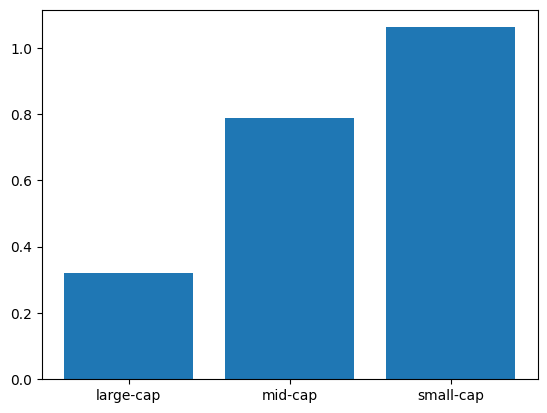

In [133]:
# Q3. Marcap_size(large-cap, mid-cap,small-cap) 수익률의 평균을 bar chart로 표현하세요.
plt.bar(mean_value.index, mean_value.ChagesRatio)

### [실습2]

1. EPS(주당 순이익)이 0 이상인 데이터를 선택
2. EPS, PER의 순위를 새로운 칼럼으로 선언
3. PER(주가수익률) 순위 - EPS 순위의 차이를 새로운 칼럼으로 선언
4. PER 순위 - EPS 순위의 차이가 가장 적은 10개의 기업 출력

In [138]:
df = stock.get_market_fundamental("20230131")
df.head()

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
095570,8075,3.66,0.77,1707,4.32,270
006840,45961,0.00,0.40,0,1.09,200
027410,16393,6.21,0.26,684,2.59,110
282330,46849,21.84,3.99,8547,1.61,3000
138930,28745,3.02,0.25,2341,7.91,560


In [150]:
# EPS(주당 순이익)이 0 이상인 데이터를 선택
df1 = df[df['EPS'] > 0].copy()
df1

,BPS,PER,PBR,EPS,DIV,DPS
티커,,,,,,
095570,8075,3.66,0.77,1707,4.32,270
027410,16393,6.21,0.26,684,2.59,110
282330,46849,21.84,3.99,8547,1.61,3000
138930,28745,3.02,0.25,2341,7.91,560
001460,577324,10.33,0.64,35764,0.41,1500
...,...,...,...,...,...,...
005870,10174,6.67,0.65,994,0.00,0
079980,14188,45.14,0.35,111,5.99,300
005010,14549,5.72,0.35,898,3.11,160


In [151]:
# EPS, PER의 순위를 새로운 칼럼으로 선언
df1['EPS_rank'] = df1['EPS'].rank()
df1['PER_rank'] = df1['PER'].rank()
df1

,BPS,PER,PBR,EPS,DIV,DPS,EPS_rank,PER_rank
티커,,,,,,,,
095570,8075,3.66,0.77,1707,4.32,270,328.0,101.0
027410,16393,6.21,0.26,684,2.59,110,214.0,211.0
282330,46849,21.84,3.99,8547,1.61,3000,522.0,511.0
138930,28745,3.02,0.25,2341,7.91,560,373.0,69.0
001460,577324,10.33,0.64,35764,0.41,1500,612.0,352.0
...,...,...,...,...,...,...,...,...
005870,10174,6.67,0.65,994,0.00,0,257.0,233.0
079980,14188,45.14,0.35,111,5.99,300,43.0,572.0
005010,14549,5.72,0.35,898,3.11,160,245.0,193.0


In [153]:
# PER(주가수익률) 순위 - EPS 순위의 차이를 새로운 칼럼으로 선언
df1['PER_diff_EPS_rank'] = abs(df1['PER_rank'] - df1['EPS_rank'])
df1

,BPS,PER,PBR,EPS,DIV,DPS,EPS_rank,PER_rank,PER_diff_EPS_rank
티커,,,,,,,,,
095570,8075,3.66,0.77,1707,4.32,270,328.0,101.0,227.0
027410,16393,6.21,0.26,684,2.59,110,214.0,211.0,3.0
282330,46849,21.84,3.99,8547,1.61,3000,522.0,511.0,11.0
138930,28745,3.02,0.25,2341,7.91,560,373.0,69.0,304.0
001460,577324,10.33,0.64,35764,0.41,1500,612.0,352.0,260.0
...,...,...,...,...,...,...,...,...,...
005870,10174,6.67,0.65,994,0.00,0,257.0,233.0,24.0
079980,14188,45.14,0.35,111,5.99,300,43.0,572.0,529.0
005010,14549,5.72,0.35,898,3.11,160,245.0,193.0,52.0


In [154]:
# PER 순위 - EPS 순위의 차이가 가장 적은 10개의 기업 출력
df1.sort_values(by = 'PER_diff_EPS_rank').head(10)

,BPS,PER,PBR,EPS,DIV,DPS,EPS_rank,PER_rank,PER_diff_EPS_rank
티커,,,,,,,,,
293480,14561,9.33,1.08,1679,3.26,510,326.0,325.0,1.0
339770,7197,7.99,1.33,1195,3.14,300,283.0,282.0,1.0
011500,9658,8.54,1.14,1288,2.09,230,296.0,294.5,1.5
105630,11835,9.46,1.37,1716,3.08,500,329.0,327.0,2.0
286940,28633,11.26,0.90,2291,2.71,700,368.0,370.0,2.0
271560,55935,19.10,2.23,6519,0.60,750,496.0,493.0,3.0
027410,16393,6.21,0.26,684,2.59,110,214.0,211.0,3.0
008260,4960,6.54,1.02,771,1.49,75,228.0,224.0,4.0
122900,11569,8.44,0.89,1213,5.86,600,287.0,291.0,4.0


### Groupby

In [175]:
dic = {
    '이름' : ['최진영', '김선희','최진영', '김선희','최진영', '김선희','최진영', '김선희'],
    '성적' : [80, 100, 85, 10, 80, 50, 80, 20],
    '회차' : [1, 1, 2, 2, 3, 3, 4, 4]
}
import pandas as pd
score = pd.DataFrame(dic)
score

,이름,성적,회차
0,최진영,80,1
1,김선희,100,1
2,최진영,85,2
3,김선희,10,2
4,최진영,80,3
5,김선희,50,3
6,최진영,80,4
7,김선희,20,4


In [174]:
score.groupby('이름').mean()   # 이름을 기준으로 값들의 평균을 구함

,성적,회차
이름,,
김선희,45.00,2.5
최진영,81.25,2.5


In [176]:
score.groupby('이름').mean([['성적']])

,성적,회차
이름,,
김선희,45.00,2.5
최진영,81.25,2.5


In [155]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,63400,1,1600,2.59,63200,63700,62600,17953108,1135586612300,378484213670000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,530000,1,8000,1.53,529000,532000,522000,261972,137876265000,124020000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,93600,1,2200,2.41,94900,94900,92700,3573147,335232615100,68141021364000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,815000,1,11000,1.37,806000,817000,806000,50598,41082526000,58006810000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,719000,2,-1000,-0.14,722000,729000,712000,182443,131046626000,49441697070000,68764530,STK


In [156]:
df_krx['Market'].unique()          # 원소들 중 unique한 값 추출

array(['KOSPI', 'KOSDAQ GLOBAL', 'KOSDAQ', 'KONEX'], dtype=object)

In [157]:
df_krx.groupby('Market').get_group('KOSPI')             # groupby()만 하면 아무것도 나오지 않는다.(.get_group()으로 그룹을 지정하여 가져올 수 있다.)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,63400,1,1600,2.59,63200,63700,62600,17953108,1135586612300,378484213670000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,530000,1,8000,1.53,529000,532000,522000,261972,137876265000,124020000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,93600,1,2200,2.41,94900,94900,92700,3573147,335232615100,68141021364000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,815000,1,11000,1.37,806000,817000,806000,50598,41082526000,58006810000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,719000,2,-1000,-0.14,722000,729000,712000,182443,131046626000,49441697070000,68764530,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,002785,KR7002781003,진흥기업우B,KOSPI,,4950,3,0,0.00,4950,5010,4915,2001,9963495,4243229100,857218,STK
2681,001527,KR7001522002,동양2우B,KOSPI,,13170,2,-10,-0.08,13290,13290,13170,70,923140,4063853730,308569,STK
2682,002787,KR7002782001,진흥기업2우B,KOSPI,,13630,1,420,3.18,13300,13730,13300,184,2515930,4018233040,294808,STK
2683,001525,KR7001521004,동양우,KOSPI,,6480,2,-10,-0.15,6490,6490,6480,47,304570,4002896880,617731,STK


In [158]:
df_krx.groupby('Market').mean()

C:\Users\GM220808\AppData\Local\Temp\ipykernel_3392\2899567089.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_krx.groupby('Market').mean()


,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
Market,,,,,,,,,
KONEX,0.791045,-0.451343,4797.925373,4875.253731,4601.082090,1645.701493,7.280415e+06,2.938358e+10,7.365916e+06
KOSDAQ,156.907466,1.424250,9749.067007,9983.442246,9623.580728,639295.912572,4.198326e+09,1.755724e+11,3.012535e+07
KOSDAQ GLOBAL,848.823529,1.795294,53005.686275,54037.647059,52237.450980,269490.529412,1.284727e+10,1.596103e+12,3.863912e+07
KOSPI,139.729873,0.630127,39851.119703,40291.208686,39313.155720,622435.386653,7.631322e+09,2.071360e+12,6.708834e+07


In [159]:
df_krx.groupby('Market')['ChagesRatio'].mean()   # groupby() -> ['ChagesRatio']들의 mean()

Market
KONEX           -0.451343
KOSDAQ           1.424250
KOSDAQ GLOBAL    1.795294
KOSPI            0.630127
Name: ChagesRatio, dtype: float64

In [160]:
df_krx.groupby('Market').mean()['ChagesRatio']     # groupby() -> mean() ->[ChagesRatio]를 series형태로

C:\Users\GM220808\AppData\Local\Temp\ipykernel_3392\1075645513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_krx.groupby('Market').mean()['ChagesRatio']


Market
KONEX           -0.451343
KOSDAQ           1.424250
KOSDAQ GLOBAL    1.795294
KOSPI            0.630127
Name: ChagesRatio, dtype: float64

In [161]:
df_krx.groupby('Market').mean()[['ChagesRatio']]   # groupby() -> mean() ->[ChagesRatio]를 데이터프레임 형태로

C:\Users\GM220808\AppData\Local\Temp\ipykernel_3392\1941483303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_krx.groupby('Market').mean()[['ChagesRatio']]


,ChagesRatio
Market,
KONEX,-0.451343
KOSDAQ,1.424250
KOSDAQ GLOBAL,1.795294
KOSPI,0.630127


In [163]:
df_krx[['Market', 'ChagesRatio']].groupby('Market').mean()  # 두개 이상의 데이터(Series 2개)를 가져와야할 땐 대괄호 2 [[]] 형태를 써야함

,ChagesRatio
Market,
KONEX,-0.451343
KOSDAQ,1.424250
KOSDAQ GLOBAL,1.795294
KOSPI,0.630127


In [164]:
df_krx.groupby('Market')[['Market', 'ChagesRatio']].mean()

C:\Users\GM220808\AppData\Local\Temp\ipykernel_3392\1725369742.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_krx.groupby('Market')[['Market', 'ChagesRatio']].mean()


,ChagesRatio
Market,
KONEX,-0.451343
KOSDAQ,1.424250
KOSDAQ GLOBAL,1.795294
KOSPI,0.630127


In [177]:
df_krx.groupby('Market').agg({'ChagesRatio' : max, 'Stocks': min})              # 'Market'기준으로 데이터가 묶인 후 agg(개별연산)을 사용하여 'ChagesRatio'는 max값, 'Stocks'는 최소값을 구함

,ChagesRatio,Stocks
Market,,
KONEX,15.00,842500
KOSDAQ,29.98,142857
KOSDAQ GLOBAL,9.59,6275415
KOSPI,27.39,109852


In [179]:
df_krx.groupby('Market').agg({'ChagesRatio' : ['max', 'count'], 'Stocks': ['min', 'mean']}) 

ChagesRatio         Stocks              
                      max count      min          mean
Market                                                
KONEX               15.00   134   842500  7.365916e+06
KOSDAQ              29.98  1567   142857  3.012535e+07
KOSDAQ GLOBAL        9.59    51  6275415  3.863912e+07
KOSPI               27.39   944   109852  6.708834e+07

### Concat

In [180]:
df_2021 = fdr.DataReader('AAPL', '2021-01-01', '2021-12-31')
df_2022 = fdr.DataReader('AAPL', '2022-01-01', '2022-12-31')
df_2022.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176514,86709100


In [184]:
concat = pd.concat([df_2021, df_2022])
print(concat.index.min(), concat.index.max())            # 잘 합쳐져있나 index의 최소, 최댓값으로 확인
concat.head()

2021-01-04 00:00:00 2022-12-30 00:00:00


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.874924,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.455978,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.098274,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.367020,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.483658,105158200


In [185]:
google = fdr.DataReader('GOOG', '2021-01-01', '2022-12-31')
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,87.876999,88.032501,85.392502,86.412003,86.412003,38038000
2021-01-05,86.250000,87.383499,85.900749,87.045998,87.045998,22906000
2021-01-06,85.131500,87.400002,84.949997,86.764503,86.764503,52042000
2021-01-07,87.002998,89.419998,86.852501,89.362503,89.362503,45300000
2021-01-08,89.399002,90.491997,88.676750,90.360497,90.360497,41012000


In [186]:
# concat 데이터의 'Close'(종가)만 가져와서 컬럼이름을 변경
AAPL = concat[['Close']].rename(columns = {'Close' : 'AAPL'})
GOOG = concat[['Close']].rename(columns = {'Close' : 'GOOG'})

In [187]:
AAPL.head()

,AAPL
Date,
2021-01-04,129.410004
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
2021-01-08,132.050003


In [188]:
GOOG.head()

,GOOG
Date,
2021-01-04,129.410004
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
2021-01-08,132.050003


In [190]:
# GOOG와 AAPL axis=1 방향으로 붙이기
concat2 = pd.concat([AAPL, GOOG], axis=1)
concat2.head()

,AAPL,GOOG
Date,,
2021-01-04,129.410004,129.410004
2021-01-05,131.009995,131.009995
2021-01-06,126.599998,126.599998
2021-01-07,130.919998,130.919998
2021-01-08,132.050003,132.050003


### Merge  (데이터의 변형이 일어날 수 있기 때문에, 데이터의 갯수-shape을 반드시 확인)

In [1]:
가격변동 = stock.get_market_price_change("20221201", "20221231")
매수량 = stock.get_market_net_purchases_of_equities("20221201", "20221231", "ALL", "전체")

NameError: name 'stock' is not defined

In [192]:
가격변동.head()

,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
095570,AJ네트웍스,6110,5720,-390,-6.38,2947645,17162545200
006840,AK홀딩스,15150,17200,2050,13.53,455492,7706148650
027410,BGF,4365,4305,-60,-1.37,14388855,62685829240
282330,BGF리테일,205500,210500,5000,2.43,712994,146603104000
138930,BNK금융지주,7390,6500,-890,-12.04,37130723,264104001940


In [193]:
매수량.head()

,종목명,매도거래량,매수거래량,순매수거래량,매도거래대금,매수거래대금,순매수거래대금
티커,,,,,,,
060310,3S,3318765,3318765,0,7721430565,7721430565,0
095570,AJ네트웍스,2947645,2947645,0,17162545200,17162545200,0
006840,AK홀딩스,455492,455492,0,7706148650,7706148650,0
054620,APS홀딩스,4001612,4001612,0,59468996600,59468996600,0
265520,AP시스템,1662030,1662030,0,31586148100,31586148100,0


In [195]:
print(가격변동.shape)
print(매수량.shape)

(942, 7)
(2625, 7)


In [196]:
# 공통된 column이 있고 값도 같아야 merge를 쓸 수 있다.
merge = pd.merge(left = 가격변동, right = 매수량, on = '종목명')            # left, right 데이터가 위치할 자리를 지정하고 on(공통된 컬럼명)을 지정   # how = 'inner' -> merge를 하면서 None을 날림
print(merge.shape)
merge

(916, 13)


,종목명,시가,종가,변동폭,등락률,거래량,거래대금,매도거래량,매수거래량,순매수거래량,매도거래대금,매수거래대금,순매수거래대금
0,AJ네트웍스,6110,5720,-390,-6.38,2947645,17162545200,2947645,2947645,0,17162545200,17162545200,0
1,AK홀딩스,15150,17200,2050,13.53,455492,7706148650,455492,455492,0,7706148650,7706148650,0
2,BGF,4365,4305,-60,-1.37,14388855,62685829240,14388855,14388855,0,62685829240,62685829240,0
3,BGF리테일,205500,210500,5000,2.43,712994,146603104000,712994,712994,0,146603104000,146603104000,0
4,BNK금융지주,7390,6500,-890,-12.04,37130723,264104001940,37130723,37130723,0,264104001940,264104001940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,휴스틸,5420,5070,-350,-6.46,9608972,49226534830,9608972,9608972,0,49226534830,49226534830,0
912,흥국화재,3165,3370,205,6.48,15972406,59888402133,15972406,15972406,0,59888402133,59888402133,0
913,흥국화재2우B,19300,16200,-3100,-16.06,18918,364549550,18918,18918,0,364549550,364549550,0
914,흥국화재우,6020,6150,130,2.16,68957,432345040,68957,68957,0,432345040,432345040,0


In [197]:
merge2 = pd.merge(left = 가격변동, right = 매수량, on = '종목명', how = 'outer')            # 각각 중복하지 않고, 적어도 하나의 종목명을 가지고 있는 갯수 = 2651
print(merge2.shape)
merge2

(2651, 13)


,종목명,시가,종가,변동폭,등락률,거래량,거래대금,매도거래량,매수거래량,순매수거래량,매도거래대금,매수거래대금,순매수거래대금
0,AJ네트웍스,6110.0,5720.0,-390.0,-6.38,2947645.0,1.716255e+10,2947645.0,2947645.0,0.0,1.716255e+10,1.716255e+10,0.0
1,AK홀딩스,15150.0,17200.0,2050.0,13.53,455492.0,7.706149e+09,455492.0,455492.0,0.0,7.706149e+09,7.706149e+09,0.0
2,BGF,4365.0,4305.0,-60.0,-1.37,14388855.0,6.268583e+10,14388855.0,14388855.0,0.0,6.268583e+10,6.268583e+10,0.0
3,BGF리테일,205500.0,210500.0,5000.0,2.43,712994.0,1.466031e+11,712994.0,712994.0,0.0,1.466031e+11,1.466031e+11,0.0
4,BNK금융지주,7390.0,6500.0,-890.0,-12.04,37130723.0,2.641040e+11,37130723.0,37130723.0,0.0,2.641040e+11,2.641040e+11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,흥구석유,NaN,NaN,NaN,NaN,NaN,NaN,5736199.0,5736199.0,0.0,3.665247e+10,3.665247e+10,0.0
2647,흥국,NaN,NaN,NaN,NaN,NaN,NaN,581035.0,581035.0,0.0,3.568359e+09,3.568359e+09,0.0
2648,흥국에프엔비,NaN,NaN,NaN,NaN,NaN,NaN,4729047.0,4729047.0,0.0,1.330887e+10,1.330887e+10,0.0
2649,희림,NaN,NaN,NaN,NaN,NaN,NaN,14299451.0,14299451.0,0.0,1.449578e+11,1.449578e+11,0.0


In [198]:
print(가격변동.shape)
print(매수량.shape)

(942, 7)
(2625, 7)


In [199]:
merge3 = pd.merge(left = 가격변동, right = 매수량, on = '종목명', how = 'left')     # how = 'right' -> 2625
print(merge3.shape)
merge3

(942, 13)


,종목명,시가,종가,변동폭,등락률,거래량,거래대금,매도거래량,매수거래량,순매수거래량,매도거래대금,매수거래대금,순매수거래대금
0,AJ네트웍스,6110,5720,-390,-6.38,2947645,17162545200,2947645.0,2947645.0,0.0,1.716255e+10,1.716255e+10,0.0
1,AK홀딩스,15150,17200,2050,13.53,455492,7706148650,455492.0,455492.0,0.0,7.706149e+09,7.706149e+09,0.0
2,BGF,4365,4305,-60,-1.37,14388855,62685829240,14388855.0,14388855.0,0.0,6.268583e+10,6.268583e+10,0.0
3,BGF리테일,205500,210500,5000,2.43,712994,146603104000,712994.0,712994.0,0.0,1.466031e+11,1.466031e+11,0.0
4,BNK금융지주,7390,6500,-890,-12.04,37130723,264104001940,37130723.0,37130723.0,0.0,2.641040e+11,2.641040e+11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,휴스틸,5420,5070,-350,-6.46,9608972,49226534830,9608972.0,9608972.0,0.0,4.922653e+10,4.922653e+10,0.0
938,흥국화재,3165,3370,205,6.48,15972406,59888402133,15972406.0,15972406.0,0.0,5.988840e+10,5.988840e+10,0.0
939,흥국화재2우B,19300,16200,-3100,-16.06,18918,364549550,18918.0,18918.0,0.0,3.645496e+08,3.645496e+08,0.0
940,흥국화재우,6020,6150,130,2.16,68957,432345040,68957.0,68957.0,0.0,4.323450e+08,4.323450e+08,0.0


In [ ]:
# how = 'right', 'left', 'inner', 'outer'  -> 기준이 될 데이터(on = '종목명')/ inner는 merge하면서 None이 날아감 

In [201]:
rename_매수량 = 매수량.rename(columns = {'종목명':'종목명(rename)'})
rename_매수량

,종목명(rename),매도거래량,매수거래량,순매수거래량,매도거래대금,매수거래대금,순매수거래대금
티커,,,,,,,
060310,3S,3318765,3318765,0,7721430565,7721430565,0
095570,AJ네트웍스,2947645,2947645,0,17162545200,17162545200,0
006840,AK홀딩스,455492,455492,0,7706148650,7706148650,0
054620,APS홀딩스,4001612,4001612,0,59468996600,59468996600,0
265520,AP시스템,1662030,1662030,0,31586148100,31586148100,0
...,...,...,...,...,...,...,...
000547,흥국화재2우B,18918,18918,0,364549550,364549550,0
000545,흥국화재우,68957,68957,0,432345040,432345040,0
003280,흥아해운,4552374,4552374,0,6915159460,6915159460,0


In [202]:
# 왼쪽과 오른쪽의 comlumn명이 다를 때(종목명, 종목명(rename))
pd.merge(left = 가격변동, right = rename_매수량, left_on = '종목명', right_on = '종목명(rename)')  

,종목명,시가,종가,변동폭,등락률,거래량,거래대금,종목명(rename),매도거래량,매수거래량,순매수거래량,매도거래대금,매수거래대금,순매수거래대금
0,AJ네트웍스,6110,5720,-390,-6.38,2947645,17162545200,AJ네트웍스,2947645,2947645,0,17162545200,17162545200,0
1,AK홀딩스,15150,17200,2050,13.53,455492,7706148650,AK홀딩스,455492,455492,0,7706148650,7706148650,0
2,BGF,4365,4305,-60,-1.37,14388855,62685829240,BGF,14388855,14388855,0,62685829240,62685829240,0
3,BGF리테일,205500,210500,5000,2.43,712994,146603104000,BGF리테일,712994,712994,0,146603104000,146603104000,0
4,BNK금융지주,7390,6500,-890,-12.04,37130723,264104001940,BNK금융지주,37130723,37130723,0,264104001940,264104001940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,휴스틸,5420,5070,-350,-6.46,9608972,49226534830,휴스틸,9608972,9608972,0,49226534830,49226534830,0
912,흥국화재,3165,3370,205,6.48,15972406,59888402133,흥국화재,15972406,15972406,0,59888402133,59888402133,0
913,흥국화재2우B,19300,16200,-3100,-16.06,18918,364549550,흥국화재2우B,18918,18918,0,364549550,364549550,0
914,흥국화재우,6020,6150,130,2.16,68957,432345040,흥국화재우,68957,68957,0,432345040,432345040,0


### [실습]

- 아래의 code를 활용하여 print문에 표현 된 섹터별 2022년도 수익률을 나타내는 DataFrame 생성하기

In [3]:
# 구성종목 티커명
for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


In [5]:
# 구성종목 조회
pdf = stock.get_index_portfolio_deposit_file("1005")
print(len(pdf), pdf)

36 ['097950', '271560', '004370', '007310', '000080', '005300', '280360', '003230', '001680', '049770', '005610', '145990', '017810', '005180', '003920', '003960', '001130', '001790', '136490', '101530', '248170', '036580', '033920', '008040', '002600', '011150', '264900', '002140', '014710', '000890', '027740', '006090', '004410', '006980', '023150', '003680']


In [4]:
# 해당 기간 가격조회
df = stock.get_market_price_change("20220101", "20221231")
df.head(2)

C:\Users\GM220808\.venv\Practice1\lib\site-packages\pykrx\stock\stock_api.py:618: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_0 = df_0.append(df_1[cond])


,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
095570,AJ네트웍스,5410,5720,310,5.73,35515006,240165143451
006840,AK홀딩스,19300,17200,-2100,-10.88,5895069,109883273500


In [7]:
# 구성종목들의 등락률률을 가져와야 함

ticker_list = stock.get_index_ticker_list()
ticker_name_list = []
for ticker in stock.get_index_ticker_list():
    ticker_name_list.append(stock.get_index_ticker_name(ticker))

In [8]:
def changes(index):
    구성종목 = pdf = stock.get_index_portfolio_deposit_file(index)
    pct = df.query('티커 in @ 구성종목')['등락률'].mean()                           # index에 포함되는 구성종목의 등락률의 평균
    return pct

In [15]:
sector = pd.DataFrame({'ticker' : ticker_list, 'name' : ticker_name_list})
sector['Changes_ratio'] = sector['ticker'].apply(changes)
sector

,ticker,name,Changes_ratio
0,1001,코스피,-18.305413
1,1002,코스피 대형주,-15.880202
2,1003,코스피 중형주,-14.790900
3,1004,코스피 소형주,-20.147207
4,1005,음식료품,-10.147778
5,1006,섬유의복,-18.448750
6,1007,종이목재,-17.417778
7,1008,화학,-17.763564
8,1009,의약품,-21.957391
9,1010,비금속광물,-22.799565
